In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.2.1', '2.2.3', '0.13.2', '3.10.0')

In [3]:
df = pd.read_csv('/Users/inisha.pradhan/Inisha_ML/A1_Predicting_Car_Prices/Cars.csv')

In [4]:
# Print the first rows of the data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Shows the datatype of the input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
# Checking the shape of the data
df.shape

(8128, 13)

In [7]:
#Describe give the statistical info like count, mean, std and many more
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
# Checking the name of the columns
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [9]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

# Data Cleaning and Processsing

In [10]:
# Mapping the owner with the unique numeric value and filling the null values Nan with 0.
owner_mapping = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 5
}

df['owner'] = df['owner'].map(owner_mapping)
df['owner'].unique()

array([1, 2, 3, 4, 5])

In [11]:
# Checking the fuel data
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [12]:
# Removed CNG and LPG from the fuel
df = df.query("fuel not in ['CNG', 'LPG']")
# Checking the values of the fuel after removing.
df['fuel'].unique() 

array(['Diesel', 'Petrol'], dtype=object)

In [13]:
#  For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float). Hint: use df.mileage.str.split
df['mileage'] = df['mileage'].str.split().str[0].astype(float)

In [14]:
# Checking the mileage data that shows in a rows
df['mileage'].head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

In [15]:
#For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)
df['engine'] = df['engine'].str.split().str[0].astype(float)
# Checking the engine data that shows in a rows
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [16]:
##For the feature max_power, remove “bhp” and convert the column to numerical type (e.g., float)
df['max_power'] = df['max_power'].str.split().str[0].astype(float)
# Checking the max_power data that shows in a rows
df['max_power'].head()


0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [17]:
# Keeping first name of the brand and removing other values
df['name'] = df['name'].str.split(' ').str[0] 
#str.split(' '): Splits each value in the brand column into a list of words based on spaces (e.g., ['Toyota', 'Corolla']).
#str[0]: Extracts the first word from the split list (e.g., Toyota).
#The updated brand column will now contain only the first word.

# Checking the brand value that shows in a rows
df['name'].head()

0     Maruti
1      Skoda
2      Honda
3    Hyundai
4     Maruti
Name: name, dtype: object

In [18]:
# Deleting the feature (column) torque
df= df.drop(columns=['torque'])

In [19]:
# Deleteing the data of the "Test Drive Cars" from the feature owner.
df = df[df['owner'] != 5]
# Condition (df['car_name'] != 'Test Drive Cars'): Keeps only rows where the car_name is not equal to "Test Drive Cars."
# Update DataFrame: The DataFrame is updated to include only the rows that meet the condition.
# Checking the owner data
df['owner'].unique()

array([1, 2, 3, 4])

<Axes: xlabel='seller_type', ylabel='count'>

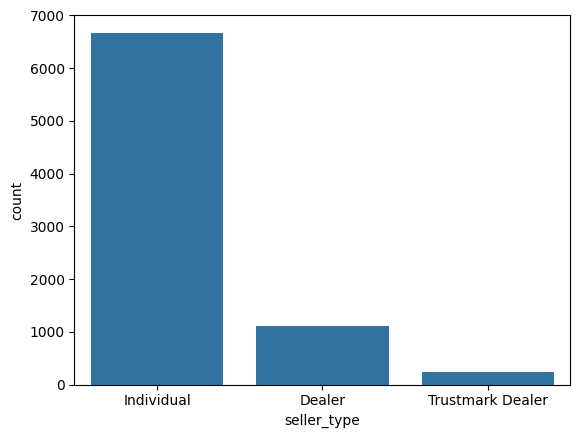

In [20]:
#scatter plot to see the seller_type
sns.countplot(data = df, x = 'seller_type')

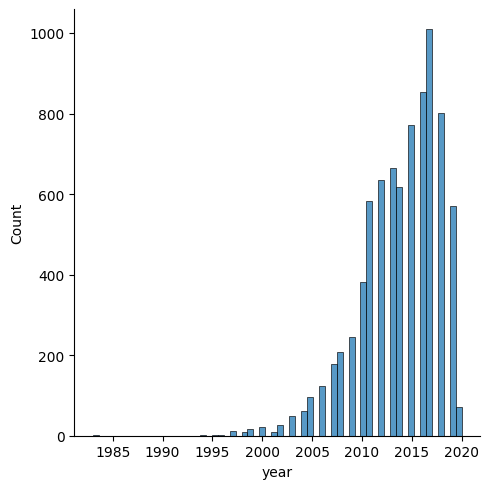

In [21]:
#Displot to show the year data 
sns.displot(data = df, x = 'year')

In [22]:
##For the feature km_driven, converting the int to the column to numerical type (e.g., float)
df['km_driven'] = df['km_driven'].astype(float)
df['km_driven'].head()

0    145500.0
1    120000.0
2    140000.0
3    127000.0
4    120000.0
Name: km_driven, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   float64
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 815.3+ KB


<Axes: xlabel='km_driven', ylabel='mileage'>

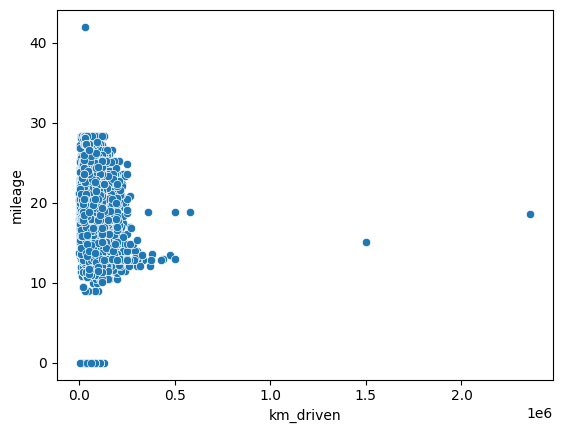

In [24]:
#scatter plot for km_driven vs mileage
sns.scatterplot(x= df['km_driven'], y = df['mileage'])

<Axes: xlabel='engine', ylabel='selling_price'>

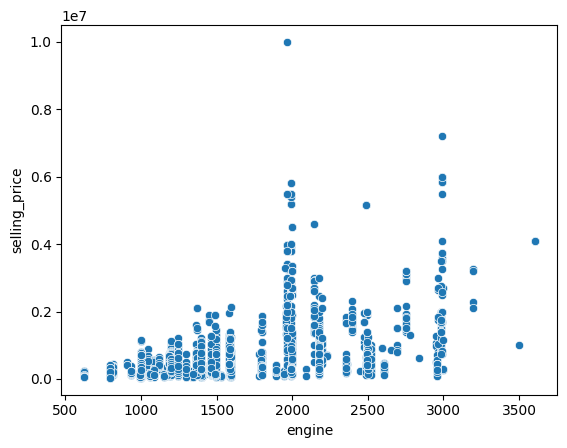

In [25]:
#scatter plot for engine vs selling price
sns.scatterplot(x= df['engine'], y = df['selling_price'])

<Axes: xlabel='engine', ylabel='max_power'>

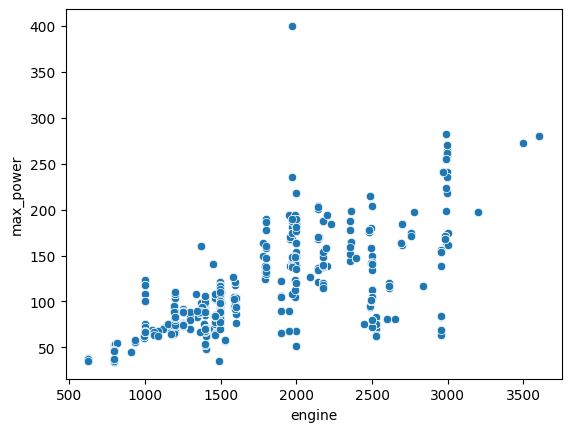

In [26]:
#scatter plot for engine vs max_power
sns.scatterplot(x =df['engine'], y=df['max_power'])

<Axes: xlabel='fuel', ylabel='km_driven'>

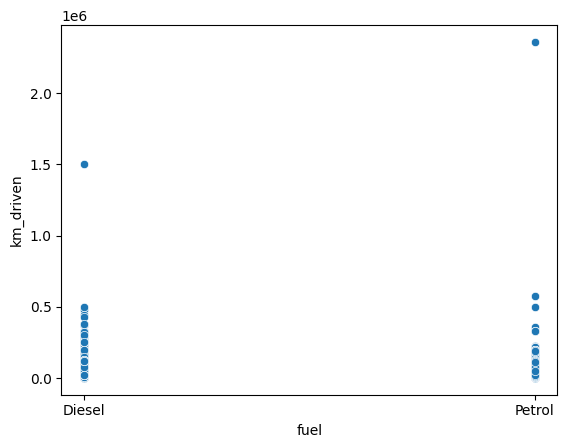

In [27]:
#scatter plot for engine vs max_power
sns.scatterplot(x =df['fuel'], y=df['km_driven'])

Text(0.5, 0, 'Seller Type')

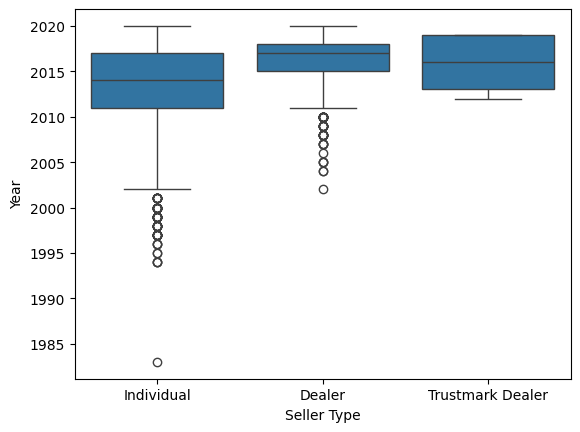

In [28]:
#Boxplot for sellet_type and year
sns.boxplot(x = df["seller_type"], y = df["year"]);
plt.ylabel("Year")
plt.xlabel("Seller Type")

<Axes: xlabel='engine', ylabel='max_power'>

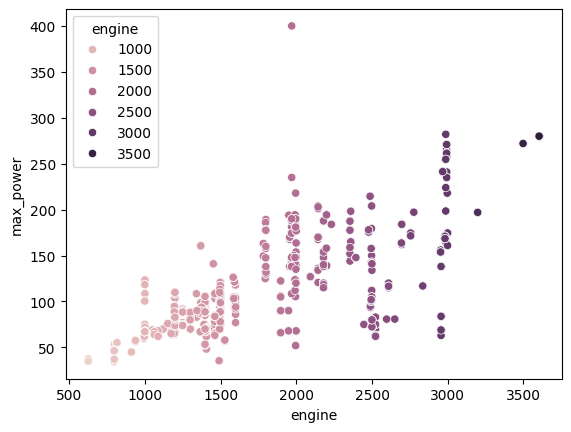

In [29]:
#Scatter plot for selling_price and year
sns.scatterplot(x = df['engine'], y = df['max_power'], hue=df['engine'])

## Correlation Matrix

### Label Encoder

In [30]:
#label Encoder for transmission 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["transmission"] = le.fit_transform(df["transmission"])
df["transmission"].unique()

array([1, 0])

In [31]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [32]:
#label Encoder for fuel 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])
df["fuel"].unique()

array([0, 1])

## Heatmap

In [33]:
# Creating a dummies data for previous data set
df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='seller_type')
print(df_encoded)

         name  year  selling_price  km_driven  fuel  transmission  owner  \
0      Maruti  2014         450000   145500.0     0             1      1   
1       Skoda  2014         370000   120000.0     0             1      2   
2       Honda  2006         158000   140000.0     1             1      3   
3     Hyundai  2010         225000   127000.0     0             1      1   
4      Maruti  2007         130000   120000.0     1             1      1   
...       ...   ...            ...        ...   ...           ...    ...   
8123  Hyundai  2013         320000   110000.0     1             1      1   
8124  Hyundai  2007         135000   119000.0     0             1      4   
8125   Maruti  2009         382000   120000.0     0             1      1   
8126     Tata  2013         290000    25000.0     0             1      1   
8127     Tata  2013         290000    25000.0     0             1      1   

      mileage  engine  max_power  seats  seller_type_Dealer  \
0       23.40  1248.0   

In [34]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          8028 non-null   object 
 1   year                          8028 non-null   int64  
 2   selling_price                 8028 non-null   int64  
 3   km_driven                     8028 non-null   float64
 4   fuel                          8028 non-null   int64  
 5   transmission                  8028 non-null   int64  
 6   owner                         8028 non-null   int64  
 7   mileage                       7814 non-null   float64
 8   engine                        7814 non-null   float64
 9   max_power                     7820 non-null   float64
 10  seats                         7814 non-null   float64
 11  seller_type_Dealer            8028 non-null   bool   
 12  seller_type_Individual        8028 non-null   bool   
 13  seller_t

In [35]:
# Dropping the columns for brand name because it have no use
df_encoded = df_encoded.drop('name', axis='columns')

<Axes: >

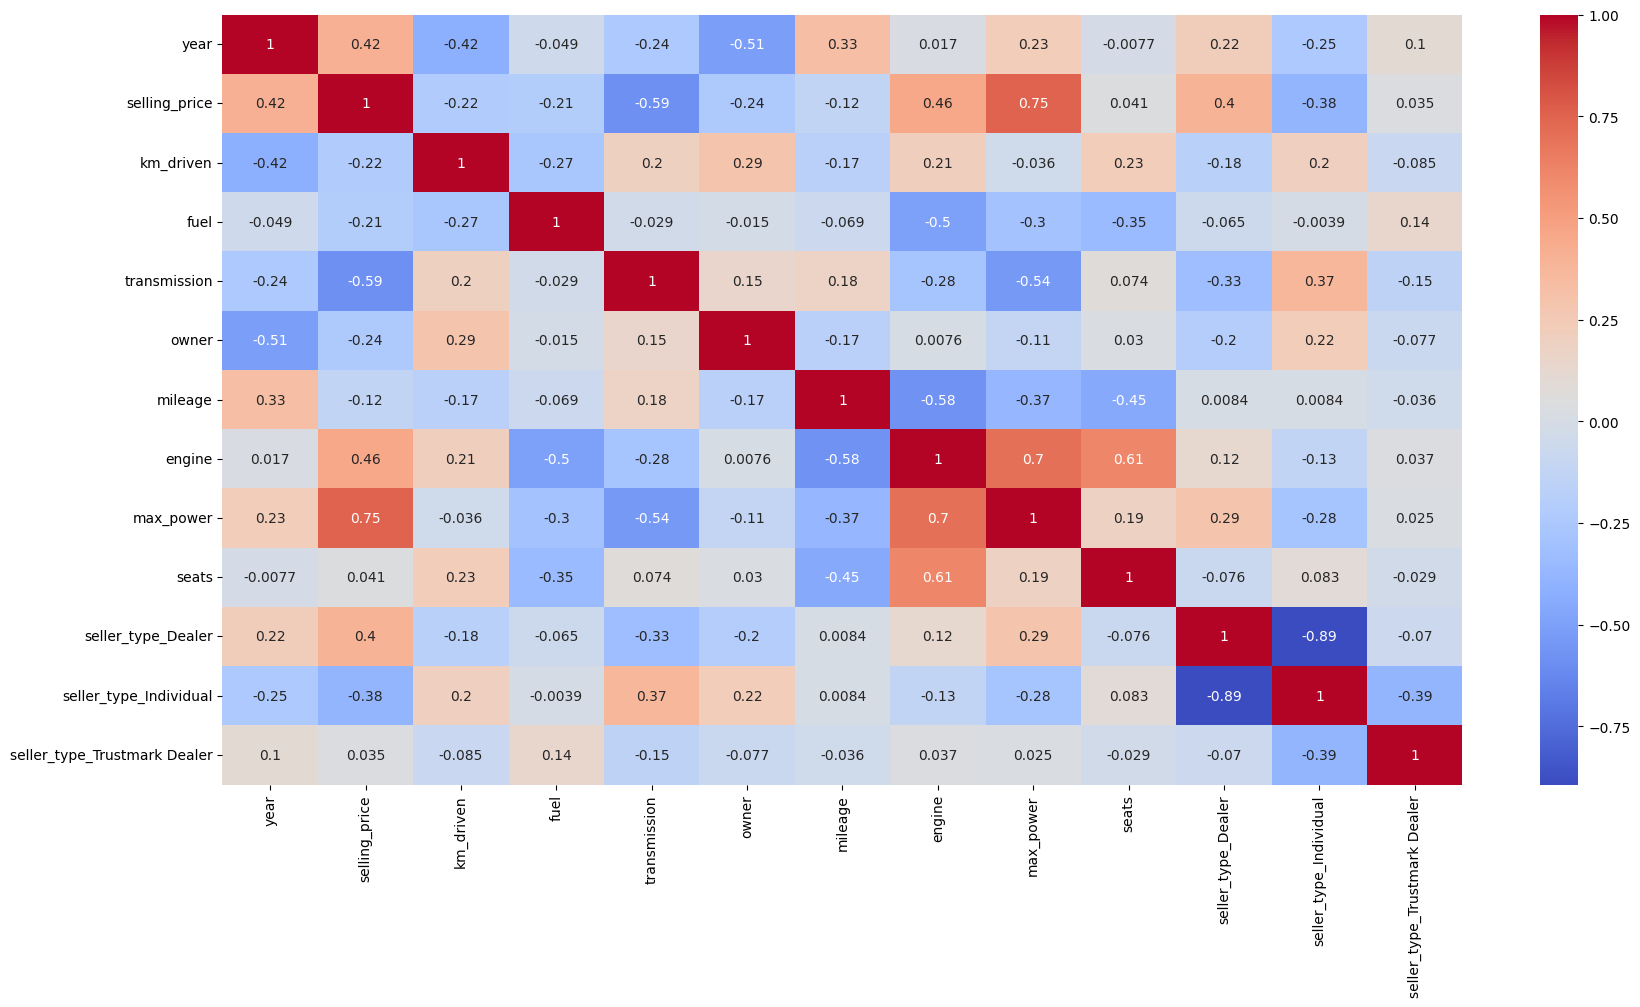

In [36]:
# Let's check out heatmap
plt.figure(figsize= (20, 10))
sns.heatmap(df_encoded.corr(), annot= True, cmap= 'coolwarm')

## Feature Selection

In [37]:
#Identifying and selecting the most relevant variables to improve model performance

X = df_encoded[['engine', 'mileage', 'km_driven', 'year']]
assert len(X.shape) ==2

In [38]:
y = np.log(df_encoded['selling_price'])
assert len(y.shape)  == 1

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 14)
#Specifies that 30% of the data will be allocated to the test set, while the remaining 70% will go to the training set.
#Specifies that 30% of the data will be allocated to the test set, while the remaining 70% will go to the training set.

## Preprocessing

In [40]:
#check for null values
X_train[['engine', 'mileage', 'km_driven', 'year']].isna().sum()

engine       157
mileage      157
km_driven      0
year           0
dtype: int64

In [41]:
X_test[['engine', 'mileage', 'km_driven', 'year']].isna().sum()

engine       57
mileage      57
km_driven     0
year          0
dtype: int64

In [42]:
y_train.isna().sum()

np.int64(0)

In [43]:
y_test.isna().sum()

np.int64(0)

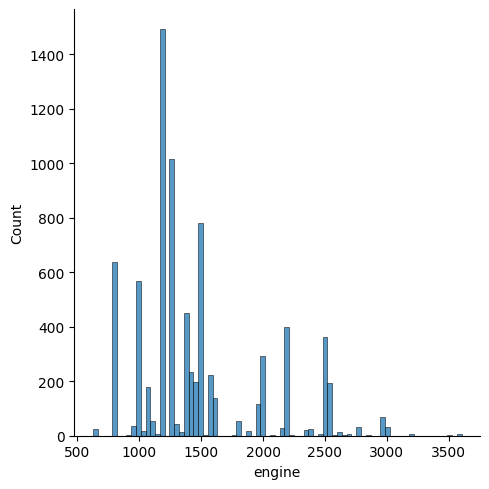

In [44]:
sns.displot(data=df_encoded, x='engine')

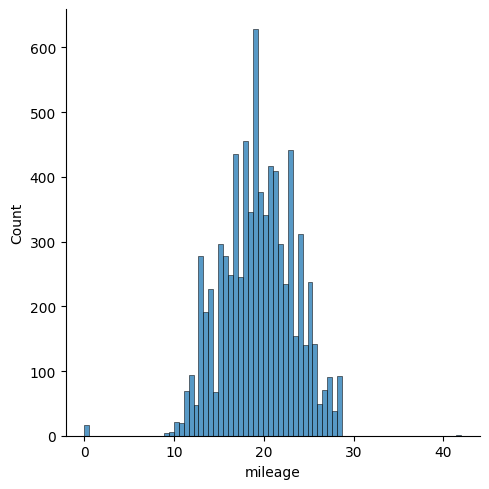

In [45]:
sns.displot(data=df_encoded, x='mileage')

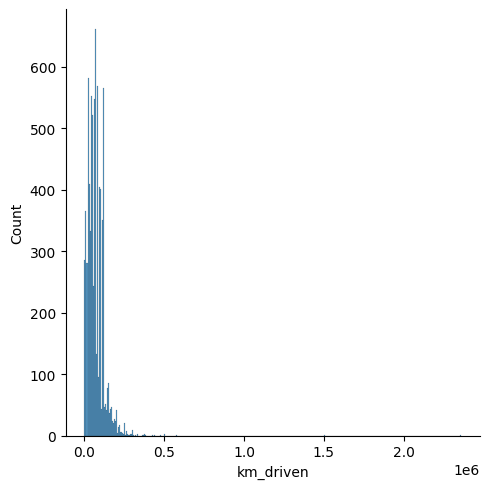

In [46]:
sns.displot(data=df_encoded, x='km_driven')

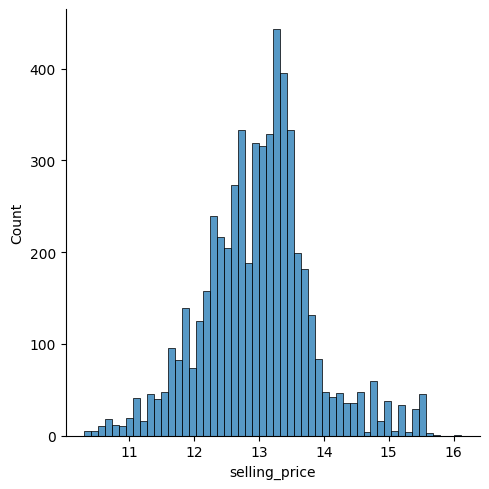

In [47]:
sns.displot(y_train)

In [48]:
# Calculating the median values for x_train and x_test and replacing missing values with median

# X_train['school'].fillna(X_train['school'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
# X_test['school'].fillna(X_train['school'].mean(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)


In [49]:
# Calculating the median values for x_train and x_test and replacing missing values with median

X_train['km_driven'].fillna(X_train['km_driven'].median(), inplace=True)
X_test['km_driven'].fillna(X_train['km_driven'].median(), inplace=True)

In [50]:
# Calculating the mean values for x_train and x_test and replacing missing values with mean

X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [51]:
X_train[['engine', 'mileage', 'km_driven', 'year']].isna().sum()
#Looks at every cell in your training data (X_train) and marks it as True if it's empty (missing) or False if it's not.
#Counts how many True values (missing cells) there are in each column of your training data.

engine       0
mileage      0
km_driven    0
year         0
dtype: int64

In [52]:
X_test[['engine', 'mileage', 'km_driven', 'year']].isna().sum()

engine       0
mileage      0
km_driven    0
year         0
dtype: int64

## Checking Outliners

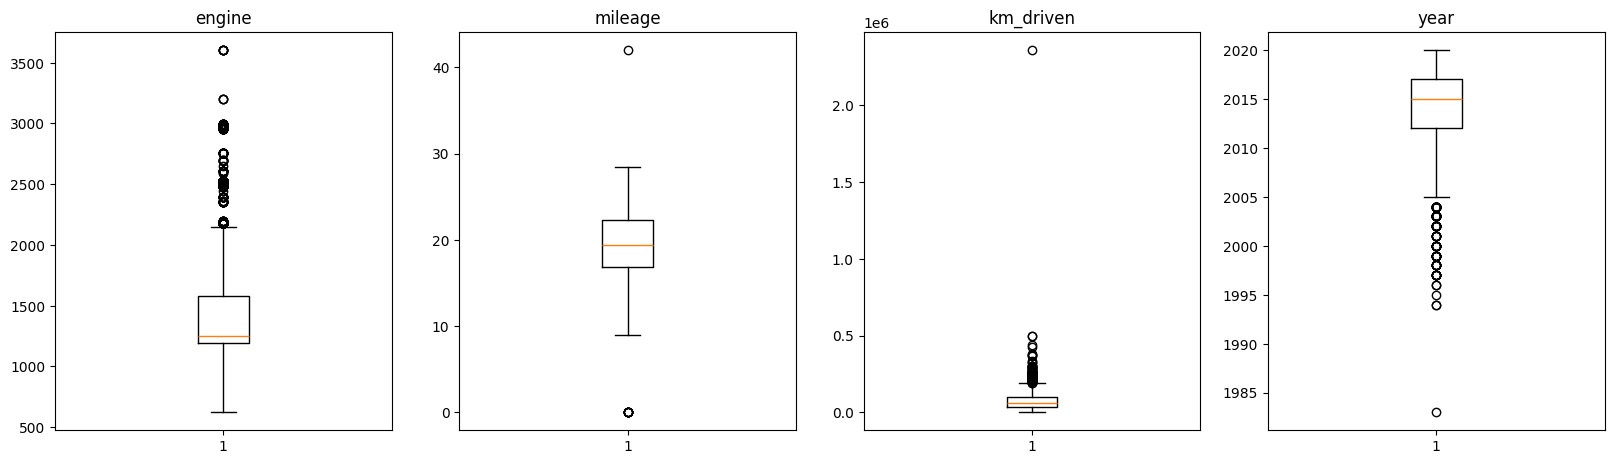

In [53]:
# Create a dictionary of columns.
col_dict = {'engine':1,'mileage':2, 'km_driven': 3, 'year':4}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [54]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [55]:
for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 842
Percent of data that is outlier: 14.98%

---------------mileage---------------

Number of outliers: 9
Percent of data that is outlier: 0.16%

---------------km_driven---------------

Number of outliers: 118
Percent of data that is outlier: 2.1%

---------------year---------------

Number of outliers: 149
Percent of data that is outlier: 2.65%


## Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [57]:
# Checking the shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 4)
Shape of X_test:  (2409, 4)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


# Modeling

In [58]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.16468218843641005
r2:  0.7607502848387157


### Cross Validation + Grid Search

In [59]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]
algorithm_name = ['LinearRegression', 'SVR', 'RandomForestRegressor', 'KNeighborsRegressor', 'DecisionTreeRegressor']

In [60]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_name[i]} - Score: {scores}; Mean: {scores.mean()}")

LinearRegression - Score: [-0.15461104 -0.19573053 -0.19996535 -0.17443505 -0.17481439]; Mean: -0.17991127183526842
SVR - Score: [-0.10912298 -0.09406168 -0.10617129 -0.11695286 -0.10748432]; Mean: -0.10675862539988679
RandomForestRegressor - Score: [-0.08631284 -0.09920394 -0.08141217 -0.10417365 -0.1037602 ]; Mean: -0.09497255953651723
KNeighborsRegressor - Score: [-0.09237421 -0.0978864  -0.09251468 -0.10517443 -0.12082407]; Mean: -0.10175476052029904
DecisionTreeRegressor - Score: [-0.06648565 -0.0665237  -0.06229723 -0.06632518 -0.05454376]; Mean: -0.06323510538623144


In [61]:
from sklearn.model_selection import GridSearchCV
# GridSearch is just cross_validation but on one single model

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None], 'n_estimators': [5, 6, 7, 8, 9, 10]}
rf = RandomForestRegressor(random_state = 20)
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid, 
                    cv=kfold, 
                    n_jobs=-1, 
                    return_train_score=True, 
                    refit=True, 
                    scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=20), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'n_estimators': [5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [62]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 10}

In [63]:
# Find your grid_search's best score
best_mse = grid.best_score_

In [64]:
best_mse

np.float64(-0.06878145009842054)

# Testing

In [65]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.06650642983909524

# Analysis

In [66]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.35416612, 0.06552453, 0.08409962, 0.49620974])

<BarContainer object of 4 artists>

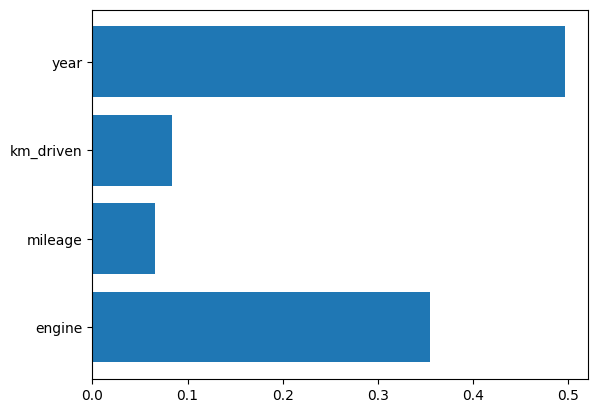

In [67]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

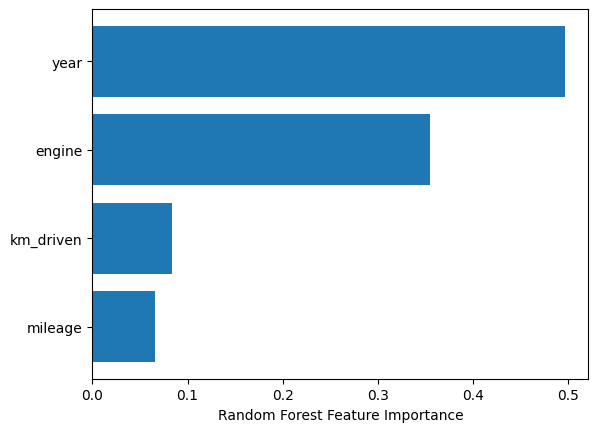

In [68]:
#hmm...let's sort first
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Inference

In [93]:
# Re-train
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=20), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'n_estimators': [5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [94]:
import pickle

# save the model to disk
pickle.dump(grid, open('model/cars.model', 'wb'))

In [95]:
# Reload and test 
load_model = pickle.load(open('model/cars.model', 'rb'))

In [96]:
print("Raw Prediction:", predicted_car)
print("Processed Prediction:", np.exp(predicted_car))

Raw Prediction: [14.62299244]
Processed Prediction: [2242254.61094209]


In [97]:
features = df_encoded[[ 'engine','mileage', 'km_driven','year']].loc[21]
features

engine        1498.0
mileage         25.5
km_driven    50000.0
year          2017.0
Name: 21, dtype: float64

In [98]:
sample_np = np.array([[1498.0, 25.5, 50000.0, 2017.0]])


In [99]:
# predicting the selling price

predicted_car = load_model.predict(sample_np)
np.exp(predicted_car)


array([791154.23841083])

In [101]:
df['selling_price'].loc[21]

np.int64(950000)